In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [118]:
#To read and extract file 
df=pd.read_excel('Sample - Superstore.xls')

In [119]:
#To check info of about data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [120]:
#Display DataFrame
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [122]:
#To check for duplicates values
duplicates=df.duplicated()
print(df[duplicates].count())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [127]:
#check null values are there 
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [130]:
#covariance
df[['Sales','Quantity','Discount','Profit']].cov()

,Sales,Quantity,Discount,Profit
Sales,388434.455308,278.459923,-3.627228,69944.096586
Quantity,278.459923,4.951113,0.003961,34.534769
Discount,-3.627228,0.003961,0.042622,-10.615173
Profit,69944.096586,34.534769,-10.615173,54877.798055


In [140]:
#showing basic stats
columns=['Sales','Quantity','Discount','Profit',]
describe_df = df[columns].describe()

# Calculate skewness and kurtosis
skewness = df[columns].skew()
kurtosis = df[columns].kurt()

# Combine all stats into one DataFrame
describe_df= describe_df.append([skewness.rename('Skewness'), kurtosis.rename('Kurtosis')])
describe_df.round(2)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7576\3089528617.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  describe_df= describe_df.append([skewness.rename('Skewness'), kurtosis.rename('Kurtosis')])


,Sales,Quantity,Discount,Profit
count,9994.00,9994.00,9994.00,9994.00
mean,229.86,3.79,0.16,28.66
std,623.25,2.23,0.21,234.26
min,0.44,1.00,0.00,-6599.98
25%,17.28,2.00,0.00,1.73
50%,54.49,3.00,0.20,8.67
75%,209.94,5.00,0.20,29.36
max,22638.48,14.00,0.80,8399.98
Skewness,12.97,1.28,1.68,7.56
Kurtosis,305.31,1.99,2.41,397.19


None


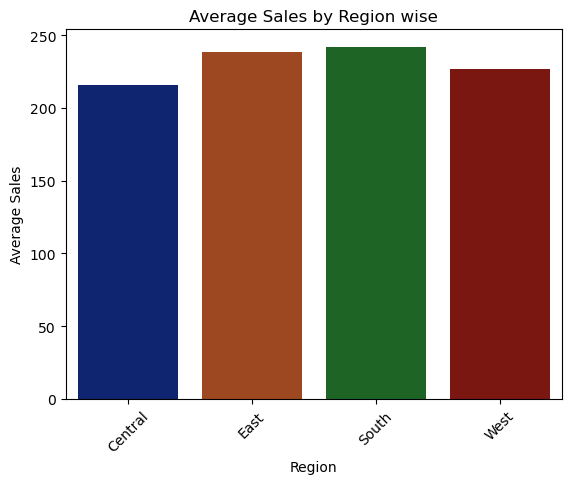

In [145]:
def plot_bar_plot(df):
#Group by data to show region to calculate sum of each region
    region_sales = df.groupby('Region')['Sales'].mean().reset_index()
    
#Plot bar graph
    plt.figure(dpi=100)
    sns.barplot(x='Region',y='Sales',data=region_sales,palette='dark')
    plt.xticks(rotation=45)
    plt.title('Average Sales by Region wise')
    plt.xlabel('Region')
    plt.ylabel('Average Sales')
print(plot_bar_plot(df))

   Year      Profit
0  2014  49543.9741
1  2015  61618.6037
2  2016  81795.1743
3  2017  93439.2696


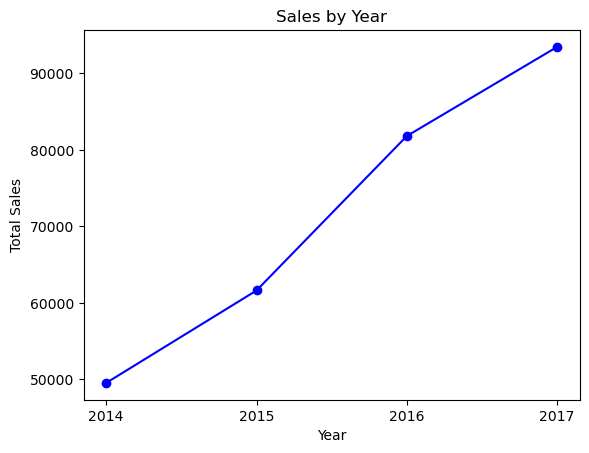

None


In [153]:
def line_plot(df):
# Extract the year from 'Order Date'
    df['Year'] = df['Order Date'].dt.year

# Group data by 'Year' and sum the 'Sales' for each year
    yearly_sales = df.groupby('Year')['Profit'].sum().reset_index()

# Create the line plot
    plt.figure(dpi=100)
    plt.plot(yearly_sales['Year'], yearly_sales['Profit'], color='blue', marker='o')

    plt.xticks(yearly_sales['Year'])
    plt.title('Sales by Year')
    plt.xlabel('Year')
    plt.ylabel('Total Sales')
    plt.show()
    
print(line_plot(df))

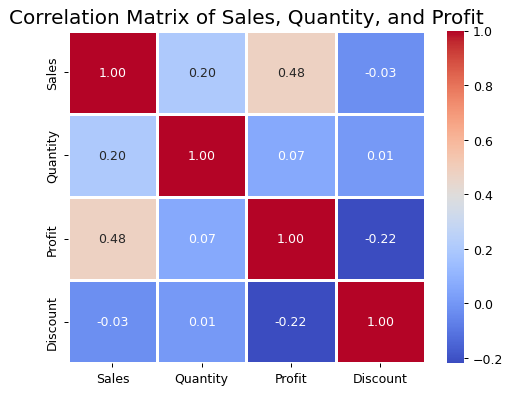

None


In [156]:
def heatmap(df):
    numeric_columns = ['Sales', 'Quantity', 'Profit','Discount']

# Calculate the correlation matrix
    correlation_matrix = df[numeric_columns].corr()

# Create a heatmap for the correlation matrix
    plt.figure(dpi=90)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
    plt.title('Correlation Matrix of Sales, Quantity, and Profit', fontsize=16)
    plt.show()
print(heatmap(df))

Skewness for Sales: 12.971
Kurtosis for Sales: 305.158


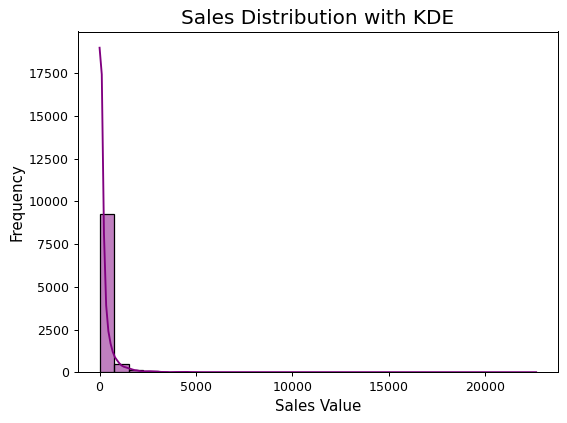

None


In [164]:
def plot_skewness_kurtosis(data, column):
# To Calculate skewness and kurtosis
    skew_value = skew(data[column])
    kurt_value = kurtosis(data[column])
    
# Print skewness and kurtosis values
    print(f"Skewness for {column}: {skew_value:.3f}")
    print(f"Kurtosis for {column}: {kurt_value:.3f}")
    
# Plotting the histogram with KDE
    plt.figure(dpi=90)
    sns.histplot(data[column], kde=True, color='purple', bins=30)
    plt.title(f'Sales Distribution with KDE', fontsize=16)
    plt.xlabel('Sales Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()

# Call function to plot skewness and kurtosis
print(plot_skewness_kurtosis(df, 'Sales'))
